# Biogeochemical data (Chl-a, NO3, O2, PO4) visualization in the Bay Of Bengal

### Author: **Md Rony Golder**, Research Assistant, Fisheries and Marine Resource Technology Discipline, Khulna University, Khulna

This notebook walks through plotting data from the Copernicus Marine Services Website. Data can be downloaded here:  https://resources.marine.copernicus.eu/product-detail/GLOBAL_ANALYSIS_FORECAST_BIO_001_028/DATA-ACCESS

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

### Required Python Modules:

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **os** | [operating system interfaces](https://docs.python.org/3.7/library/os.html) (manage paths, create directories...) |
| **numpy** | [NumPy](https://numpy.org/) allows carrying out scientific computing with Python and managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) handles netCDF files in an intuitive and interactive way. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python numerical plotting library |
| **basemap** |[The basemap toolkit](https://matplotlib.org/basemap/) is a library for plotting 2D data on maps. |

#### Import libraries ####

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm
import math
import matplotlib

Let's check the content of the monthly mean of the Baltic reanalysis biogeochemical product. For this, we need to define:
- `FName`: the path of the NetCDF file 

These variables can of course be changed later on depending on the netCDF filename and where the data is stored. 

In [2]:
FName= 'global-analysis-forecast-bio-001-028-monthly_1641831828319.nc'

Now that we have told Jupyter which data we are going to work with and where it is, we need to open this data.
The following cell opens the netCDF file (`xr.open_dataset()` function) and allows you to interactively browse the content of the file. 

### Open and browse the file

In [3]:
xr.open_dataset(FName)

<xarray.Dataset>
Dimensions:    (time: 12, depth: 50, latitude: 81, longitude: 81)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * time       (time) datetime64[ns] 2020-07-16T12:00:00 ... 2021-06-16
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 99.5 99.75 100.0
Data variables:
    no3        (time, depth, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    Conventions:                   CF-1.0
    comment:                       
    history:                       Data extracted from dataset http://localho...

We can access the **attributes** of a variable by clicking on the **Show/Hide Attribute button** and you can access the **data representation** of a variable by clicking on the **Show/Hide data repr button**. Both buttons are located in the most right column of the product browser.

Now, to store the file content into an xarray Dataset `FIn` and print the content of the dataset, you need to execute the following cell:

In [4]:
FIn = xr.open_dataset(FName);
FIn.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (time: 12, depth: 50, latitude: 81, longitude: 81)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * time       (time) datetime64[ns] 2020-07-16T12:00:00 ... 2021-06-16
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 99.5 99.75 100.0
Data variables:
    no3        (time, depth, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/s

To get information about all variables:

### Print the different variables of a netCDF file ###

In [5]:
FIn.data_vars

Data variables:
    no3      (time, depth, latitude, longitude) float32 ...
    o2       (time, depth, latitude, longitude) float32 ...
    po4      (time, depth, latitude, longitude) float32 ...
    chl      (time, depth, latitude, longitude) float32 ...

This function displays all the available variables in one product along with the dimensions they depend on and their data type (`float32` here, meaning that each values is a float coded on 32 bits). You can see that the present variables in the files depend on several coordinates. To get information about these coordinates:

### Print the coordinates of a netCDF file ###

In [6]:
FIn.coords

Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * time       (time) datetime64[ns] 2020-07-16T12:00:00 ... 2021-06-16
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 99.5 99.75 100.0

<div class="alert alert-block alert-warning"> As you can see, the dataset is **4D** (latitude, longitude, depth and time)!

To get information about the product dimensions

### Print the dimensions of a netCDF file ###

In [7]:
FIn.dims

Frozen({'time': 12, 'depth': 50, 'latitude': 81, 'longitude': 81})

If you want to display the values of a particular variable or coordinate/dimension, type `FIn.variable.values`. For example for the `time` coordinate:

### Print the values of a netCDF file variable ###

In [8]:
FIn.time.values

array(['2020-07-16T12:00:00.000000000', '2020-08-16T12:00:00.000000000',
       '2020-09-16T00:00:00.000000000', '2020-10-16T12:00:00.000000000',
       '2020-11-16T00:00:00.000000000', '2020-12-16T12:00:00.000000000',
       '2021-01-16T12:00:00.000000000', '2021-02-15T00:00:00.000000000',
       '2021-03-16T12:00:00.000000000', '2021-04-16T00:00:00.000000000',
       '2021-05-16T12:00:00.000000000', '2021-06-16T00:00:00.000000000'],
      dtype='datetime64[ns]')

If you want to store the values of a variable in an array, type `MyArray = FIn.variable.values`. For example for the `time` variable:

### Store only the values in a variable ###

In [9]:
VarTime=FIn.time.values

If you want to check the content of `Myarray` type `print(Myarray)`. For example for `VarTime`:

### Print the content of the array variable ###

In [10]:
print(VarTime)

['2020-07-16T12:00:00.000000000' '2020-08-16T12:00:00.000000000'
 '2020-09-16T00:00:00.000000000' '2020-10-16T12:00:00.000000000'
 '2020-11-16T00:00:00.000000000' '2020-12-16T12:00:00.000000000'
 '2021-01-16T12:00:00.000000000' '2021-02-15T00:00:00.000000000'
 '2021-03-16T12:00:00.000000000' '2021-04-16T00:00:00.000000000'
 '2021-05-16T12:00:00.000000000' '2021-06-16T00:00:00.000000000']




### Select the variable name
In this notebook, we will have a closer look at the [chlorophyll] from monthly mean variables. We need to define:
- `VarName`: the name of the variable of interest in the netCDF file
- `PathOut`: directory to store the generated plots (automatically generated if it doesn't already exist)

In [11]:
VarName = "chl"

# Create output dir to save plots
PathOut = 'Plots_model_' + VarName
if not os.path.exists(PathOut):
    os.makedirs(PathOut)
print('PLOTS FOLDER:', PathOut)

PLOTS FOLDER: Plots_model_chl


In the code cell below, we store the content of the `latitude`,`longitude` variables in `Lat`, `Lon`, following the example of above cell

In [12]:
Lon=FIn.longitude.values
Lat=FIn.latitude.values

We are going to use a different method to store the `VarName` (`chl`) depending on if you ran, as `FIn` has no variable called `VarName`.

In [13]:
Var=FIn[VarName] #Get the variable VarName and associated coordinates and attributes
Var  #Browse the resulting xarray dasaset

<xarray.DataArray 'chl' (time: 12, depth: 50, latitude: 81, longitude: 81)>
[3936600 values with dtype=float32]
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * time       (time) datetime64[ns] 2020-07-16T12:00:00 ... 2021-06-16
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 99.5 99.75 100.0
Attributes:
    long_name:      Total Chlorophyll
    standard_name:  mass_concentration_of_chlorophyll_a_in_sea_water
    units:          mg m-3
    unit_long:      milligram of Chlorophyll per cubic meter
    _ChunkSizes:    [  1  13 171 360]

##### GENERATE, SHOW AND SAVE THE PLOTS


We will plot the variable of interest for the following selected dates:
- January 2021

You can try to plot different dates after the exercise if you wish to.

In this cell we first need to define:
- `LatMin`, `LatMax`, `LonMin`, `LonMax`: the plotting window
- `Date_plot1` is the date to plot with a format compatible with `VarTime`
Then `xr.sel()` `sel`ects the `nearest` dates to `Date_plot1` in the time variable of the `Var` dataset from the above CELL.

In [14]:
LatMin = 16
LatMax = 23
LonMin = 88
LonMax = 93

# Define the date to plot (YYYY-MM-DDTHH-mm-ss)
# The monthly datasets provide mean values centered on the 15th or 16th at 00h00 or 12h00
Date_plot1='2021-01-01T00:00:00'

# Extract the data corresponding to these dates
# Date selection and print the content of the resulting data array
Var_date1=Var.sel(time=Date_plot1, method='nearest')
print('Selected date1 to plot:', Var_date1.time.values)
print(Var_date1,"\n")

Selected date1 to plot: 2021-01-16T12:00:00.000000000
<xarray.DataArray 'chl' (depth: 50, latitude: 81, longitude: 81)>
[328050 values with dtype=float32]
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
    time       datetime64[ns] 2021-01-16T12:00:00
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 99.5 99.75 100.0
Attributes:
    long_name:      Total Chlorophyll
    standard_name:  mass_concentration_of_chlorophyll_a_in_sea_water
    units:          mg m-3
    unit_long:      milligram of Chlorophyll per cubic meter
    _ChunkSizes:    [  1  13 171 360] 



As we saw earlier, `xr.open_dataset` interpets the time variable as a date. The precision of this date (ns) is too high as we are looking up monthly average values. It would be more practical to work with date object of the type YYYY-MM-DD. To do so, you should use the `astype('datetime64[unit]')` function as set out in the cell below. We will use the day `[D]` time unit here. 


In [15]:
date1=Var_date1.time.values.astype('datetime64[D]')
print('Var_date1 down to ns:',Var_date1.time.values)
print('date1 down to days with astype() function:',date1)

Var_date1 down to ns: 2021-01-16T12:00:00.000000000
date1 down to days with astype() function: 2021-01-16


##### Plot the data with 1 figure per date
The main functions used in the following cell to generate a plot are:
- `plt.figure()`: creates a new figure of dimensions `figsize(width,height)` in inches
- `Basemap()`creates a map background and allows to define all the properties (such as projection, plotting window, coastlines, etc.)
- `meshgrid()`: creates two grids of dimensions (Lon, Lat). It dupplicates the Lon vector along the Lat vector and stores it in LonG and dupplicates the Lat vector along the Lon vector and stores it in LatG.
- `Map()`: converts Lat/Lon projection to X/Y axis.
- `contourf()`: creates a pseudocolor plot with a rectangular grid.
- `astype()`: allows to change the `datetime64` object datatype

Save file: Plots_model_chl/plot_chl_2021-01-16.png


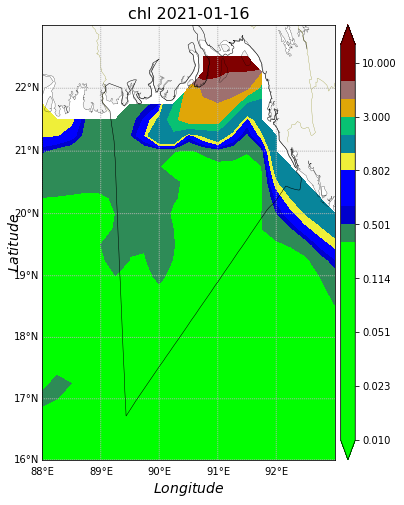

In [16]:
plt.figure(figsize=(8,8))

#Basemap instance with MERCATOR projection (cylindrical conformal proj)
Map = Basemap(projection='merc',
              llcrnrlon=LonMin, llcrnrlat=LatMin,
              urcrnrlon=LonMax, urcrnrlat=LatMax,
              resolution='i')

# Draw coastlines, country boundaries, fill continents.
Map.drawcoastlines(linewidth=0.25)
Map.drawcountries(linewidth=0.25, color='olive')
Map.fillcontinents(color='whitesmoke')

# Draw parallels & meridians
parallels = np.arange(16,23,1)
Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
meridians = np.arange(88,93,1)
Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')
Map.readshapefile('BD_boundary/BD_new_martime_boundary', 'Watersheds')

# Generate Lat/Lon grid
LonG, LatG = np.meshgrid(Lon, Lat)

# Projection from Lat/Lon to axis X/Y 
X, Y = Map(LonG, LatG)
import matplotlib.colors
colors = ['#00FF00',"#2E8B57","#0000CD","#0000FF", "#efef39", "#53a447","#084668","#08859B","#08ACAC","#08FFFF","#08E7B2","#08C173","#088F4F",
"#2F9708","#65CE08","#DFE508","#E0A608","#DF4608","#B60808","#701313","#86403F","#9E706F","#B69F9F","#800000"]
cmap= matplotlib.colors.ListedColormap(colors)
norm= matplotlib.colors.Normalize(vmin=0.01,vmax=5)
P = Map.contourf(X, Y, Var_date1[0,:,:], cmap=cmap,extend='both',
norm=norm,levels=[0.01,0.0131089,0.017185, 0.022536,0.029543,0.03872,0.050771,0.066556,0.087282,0.11442099,0.149996,
0.252085,0.501, 0.602,0.702,0.802,1,2,3,4,5,10,15])

#Add color scale
Cb = Map.colorbar(P, "right")
#Title
Title = '{} {}'.format(VarName,date1)
plt.title(Title, fontsize=16)

# Axes labels
plt.ylabel('$Latitude$', labelpad=20, fontsize=14)
plt.xlabel('$Longitude$', labelpad=20, fontsize=14)
#Save file
FOutName = '{}/plot_{}_{}.png'.format(PathOut,VarName,date1)
print('Save file:', FOutName)
plt.savefig(FOutName)
plt.show()  

#### Monthly variations over the one year
As we want to plot the variable concentration for the 12 available months in the product, we introduce a loop on the `Var.time.values` array to automate the subplots generation.

Save file: Plots_model_chl/plot_chl_all_dates.png


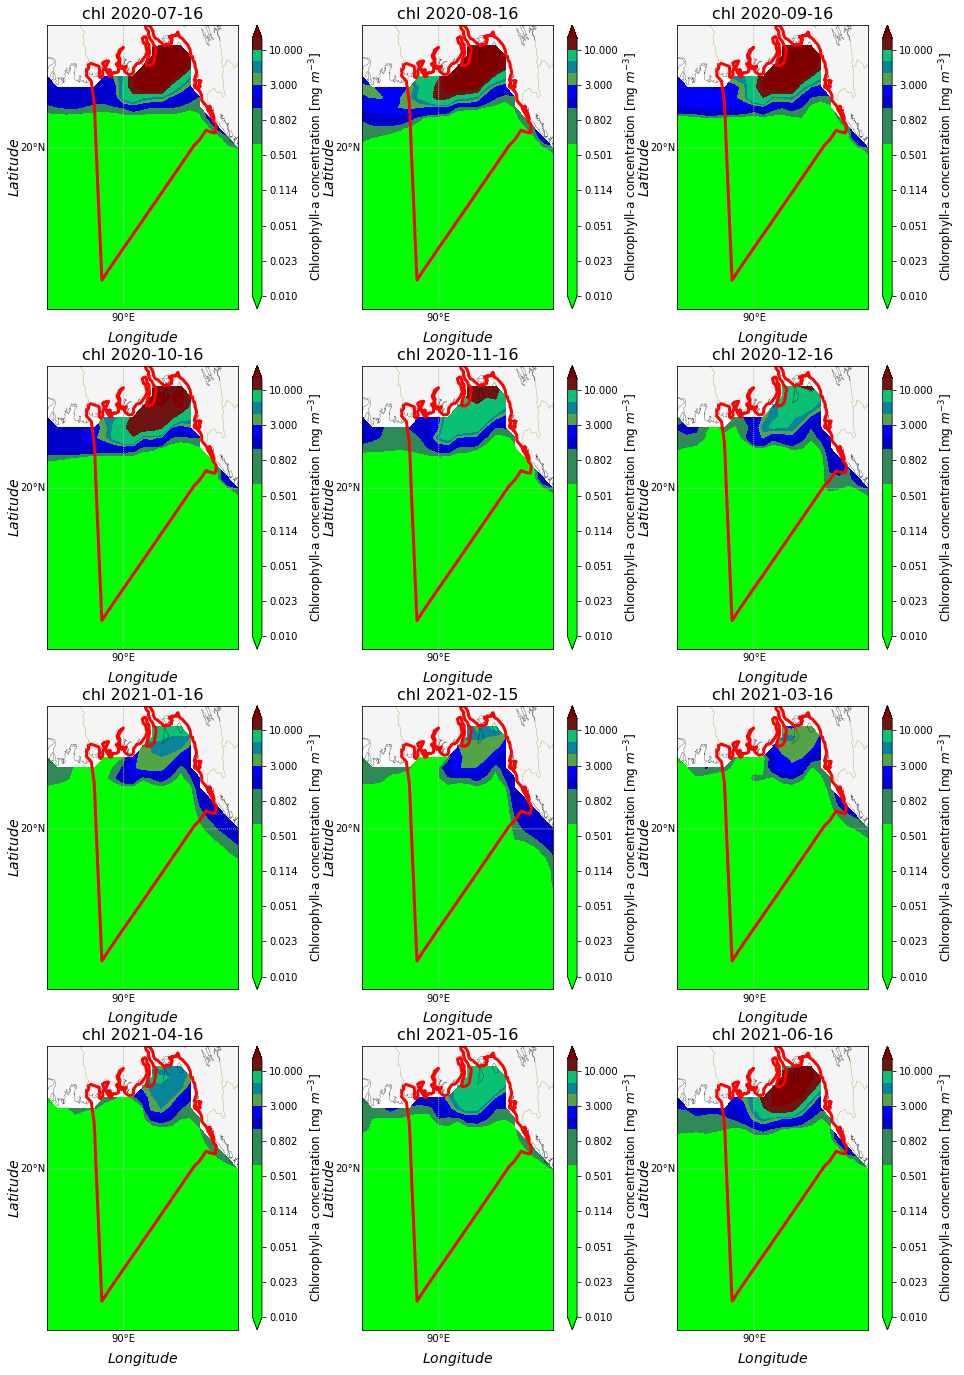

In [17]:
#Create the figure
fig, axes = plt.subplots(4,3, figsize=(16,24))  # 16 is width, 24 is height

axes = axes.ravel() # Convert axes to a flattened 1D array

#Loop on dates to plot data: 
#Loop on dates to plot data: 

for ti in range(len(Var.time.values)):

    axe=axes[ti] 

    date=Var.time.values[ti].astype('datetime64[D]')
    
    #Basemap instance with MERCATOR projection (cylindrical conformal proj)
    Map = Basemap(projection='merc',ax=axe,
                  llcrnrlon=LonMin, llcrnrlat=LatMin,
                  urcrnrlon=LonMax, urcrnrlat=LatMax,
                  resolution='i')

    # Draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    parallels = np.arange(5,24,5)
    Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
    meridians = np.arange(80,100,5)
    Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')
    Map.readshapefile('BD_boundary/BD_new_martime_boundary', 'Watersheds', color = 'red', linewidth=3)
    # Generate Lat/Lon grid
    LonG, LatG = np.meshgrid(Lon, Lat)

    # Projection from Lat/Lon to axis X/Y 
    X, Y = Map(LonG, LatG)

    # Plot scalar Var[time_index,lat,lon] 
    # Adjust scale to the min/max values
    xrange=range
    colors = ['#00FF00',"#2E8B57","#0000CD","#0000FF", "#efef39", "#53a447","#084668","#08859B","#08ACAC","#08FFFF","#08E7B2","#08C173","#088F4F",
    "#2F9708","#65CE08","#DFE508","#E0A608","#DF4608","#B60808","#701313","#86403F","#9E706F","#B69F9F","#800000"]
    cmap= matplotlib.colors.ListedColormap(colors)
    P = axe.contourf(X, Y, Var[ti,0,:,:], cmap=cmap,extend='both',
    levels=[0.01,0.0131089,0.017185, 0.022536,0.029543,0.03872,0.050771,0.066556,0.087282,0.11442099,0.149996,
    0.252085,0.501, 0.602,0.702,0.802,1,2,3,4,5,10,15])
    
    #Add color scale
    Cb = Map.colorbar(P, "right", pad=0.2)
    Cb.ax.set_ylabel('Chlorophyll-a concentration [mg $m^{-3}$]', fontsize = 12)

    #Title
    Title = '{} {}'.format(VarName,date)
    axe.set_title(Title, fontsize=16)
    

    # Axes labels
    axe.set_ylabel('$Latitude$', labelpad=25, fontsize=14)
    axe.set_xlabel('$Longitude$', labelpad=20, fontsize=14)    
    
#Save file
FOutName = '{}/plot_{}_all_dates.png'.format(PathOut,VarName)
print('Save file:', FOutName)
plt.rcParams["font.family"] = "Times New Roman" 
plt.savefig(FOutName)

plt.show()

Ssubplots generation for the `NO3` variable in one cell

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Save file: Plots_model_chl/plot_no3_all_dates.png


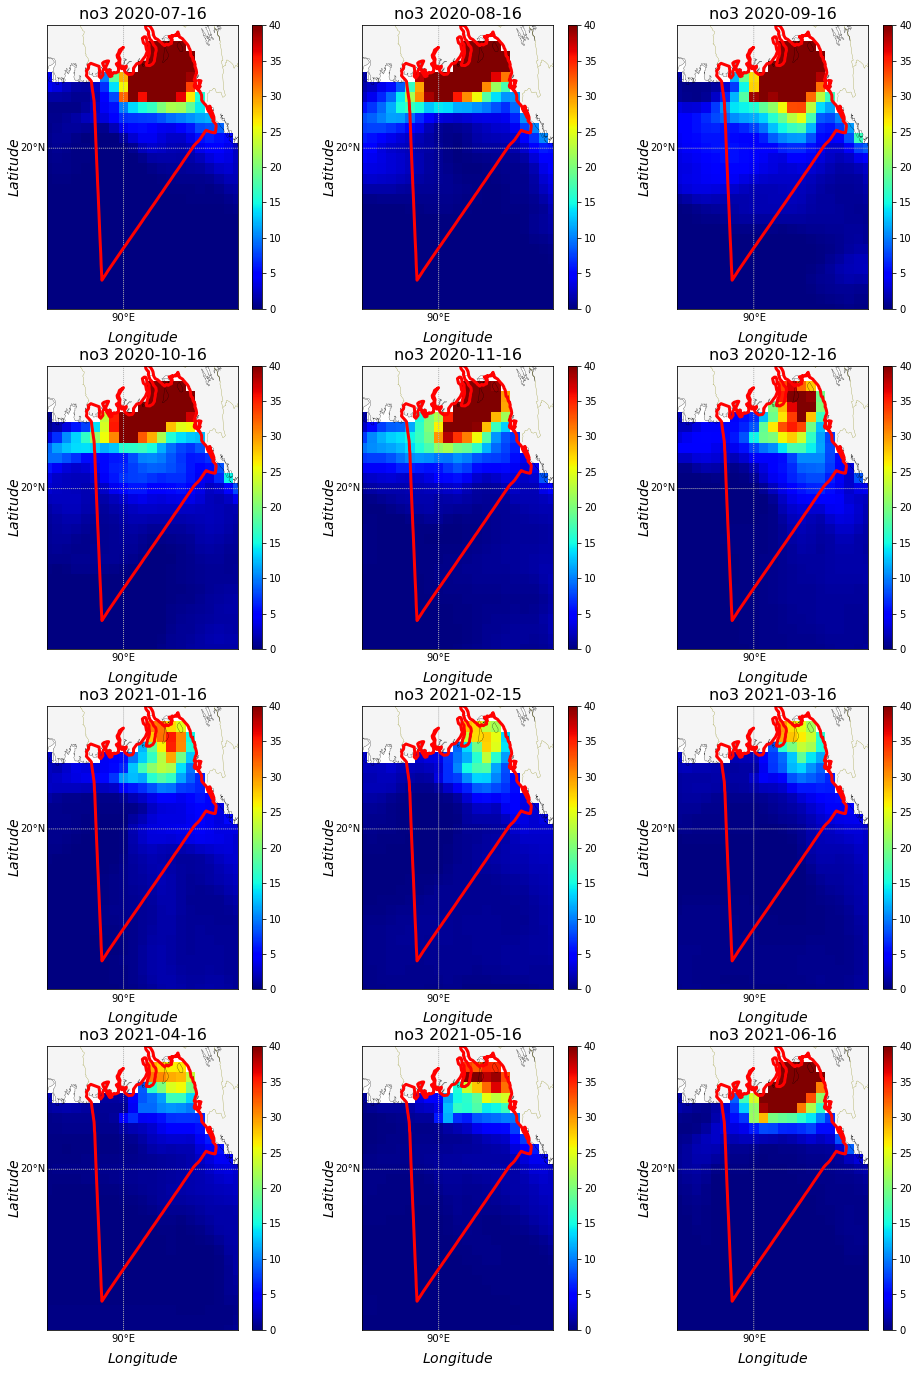

In [18]:
VarName = "no3"
Var1=FIn[VarName]
#Create the figure
fig, axes = plt.subplots(4,3, figsize=(16,24))  # 16 is width, 24 is height

axes = axes.ravel() # Convert axes to a flattened 1D array

#Loop on dates to plot data: 
#Loop on dates to plot data: 

for ti in range(len(Var1.time.values)):

    axe=axes[ti] 

    date=Var1.time.values[ti].astype('datetime64[D]')
    
    #Basemap instance with MERCATOR projection (cylindrical conformal proj)
    Map = Basemap(projection='merc',ax=axe,
                  llcrnrlon=LonMin, llcrnrlat=LatMin,
                  urcrnrlon=LonMax, urcrnrlat=LatMax,
                  resolution='i')

    # Draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    parallels = np.arange(5,24,5)
    Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
    meridians = np.arange(80,100,5)
    Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')
    Map.readshapefile('BD_boundary/BD_new_martime_boundary', 'Watersheds', color = 'red', linewidth=3)
    # Generate Lat/Lon grid
    LonG, LatG = np.meshgrid(Lon, Lat)

    # Projection from Lat/Lon to axis X/Y 
    X, Y = Map(LonG, LatG)

    # Plot scalar Var[time_index,lat,lon] 
    # Adjust scale to the min/max values
    P = axe.pcolormesh(X, Y, Var1[ti,0,:,:], cmap='jet', vmin=0 ,vmax=40)
    
    #Add color scale
    Cb = Map.colorbar(P, "right", pad=0.2)
    #Cb.ax.set_ylabel('Chlorophyll-a concentration [mg $m^{-3}$]', fontsize = 12)

    #Title
    Title = '{} {}'.format(VarName,date)
    axe.set_title(Title, fontsize=16)
    

    # Axes labels
    axe.set_ylabel('$Latitude$', labelpad=25, fontsize=14)
    axe.set_xlabel('$Longitude$', labelpad=20, fontsize=14)    
    
#Save file
FOutName = '{}/plot_{}_all_dates.png'.format(PathOut,VarName)
print('Save file:', FOutName)
plt.rcParams["font.family"] = "Times New Roman" 
#plt.savefig(FOutName)

plt.show()

Similarly for `O2'

Save file: Plots_model_chl/plot_o2_all_dates.png


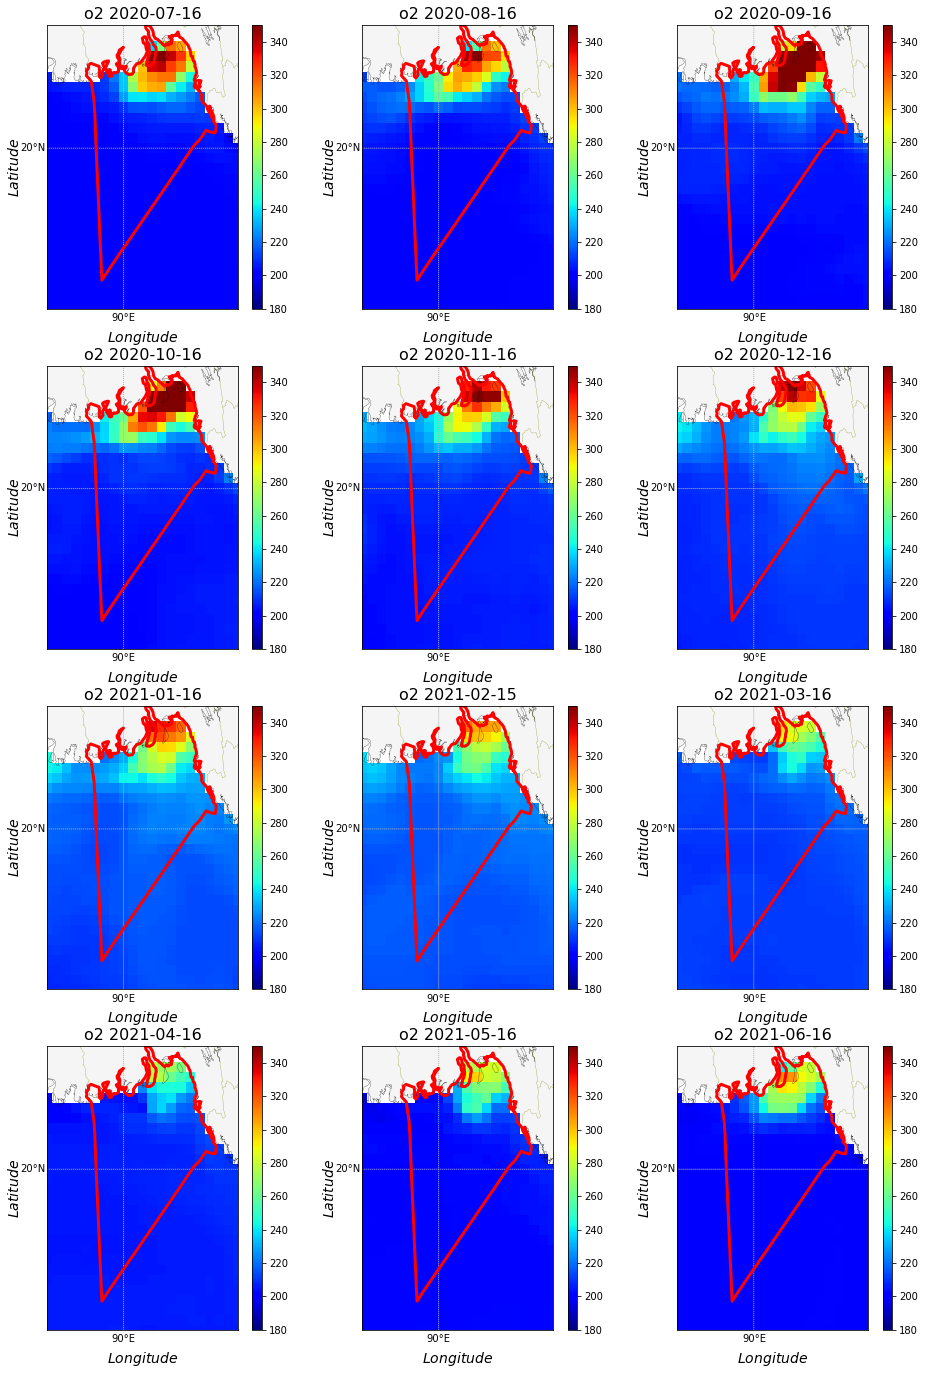

In [19]:
VarName = "o2"
Var2=FIn[VarName]
#Create the figure
fig, axes = plt.subplots(4,3, figsize=(16,24))  # 16 is width, 24 is height

axes = axes.ravel() # Convert axes to a flattened 1D array

#Loop on dates to plot data: 
#Loop on dates to plot data: 

for ti in range(len(Var2.time.values)):

    axe=axes[ti] 

    date=Var2.time.values[ti].astype('datetime64[D]')
    
    #Basemap instance with MERCATOR projection (cylindrical conformal proj)
    Map = Basemap(projection='merc',ax=axe,
                  llcrnrlon=LonMin, llcrnrlat=LatMin,
                  urcrnrlon=LonMax, urcrnrlat=LatMax,
                  resolution='i')

    # Draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    parallels = np.arange(5,24,5)
    Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
    meridians = np.arange(80,100,5)
    Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')
    Map.readshapefile('BD_boundary/BD_new_martime_boundary', 'Watersheds', color = 'red', linewidth=3)
    # Generate Lat/Lon grid
    LonG, LatG = np.meshgrid(Lon, Lat)

    # Projection from Lat/Lon to axis X/Y 
    X, Y = Map(LonG, LatG)

    # Plot scalar Var[time_index,lat,lon] 
    # Adjust scale to the min/max values
    P = axe.pcolormesh(X, Y, Var2[ti,0,:,:], cmap='jet', vmin=180 ,vmax=350)
    
    #Add color scale
    Cb = Map.colorbar(P, "right", pad=0.2)
    #Cb.ax.set_ylabel('Chlorophyll-a concentration [mg $m^{-3}$]', fontsize = 12)

    #Title
    Title = '{} {}'.format(VarName,date)
    axe.set_title(Title, fontsize=16)
    

    # Axes labels
    axe.set_ylabel('$Latitude$', labelpad=25, fontsize=14)
    axe.set_xlabel('$Longitude$', labelpad=20, fontsize=14)    
    
#Save file
FOutName = '{}/plot_{}_all_dates.png'.format(PathOut,VarName)
print('Save file:', FOutName)
plt.rcParams["font.family"] = "Times New Roman" 
#plt.savefig(FOutName)

plt.show()

and the last and final variable `PO4`

Save file: Plots_model_chl/plot_po4_all_dates.png


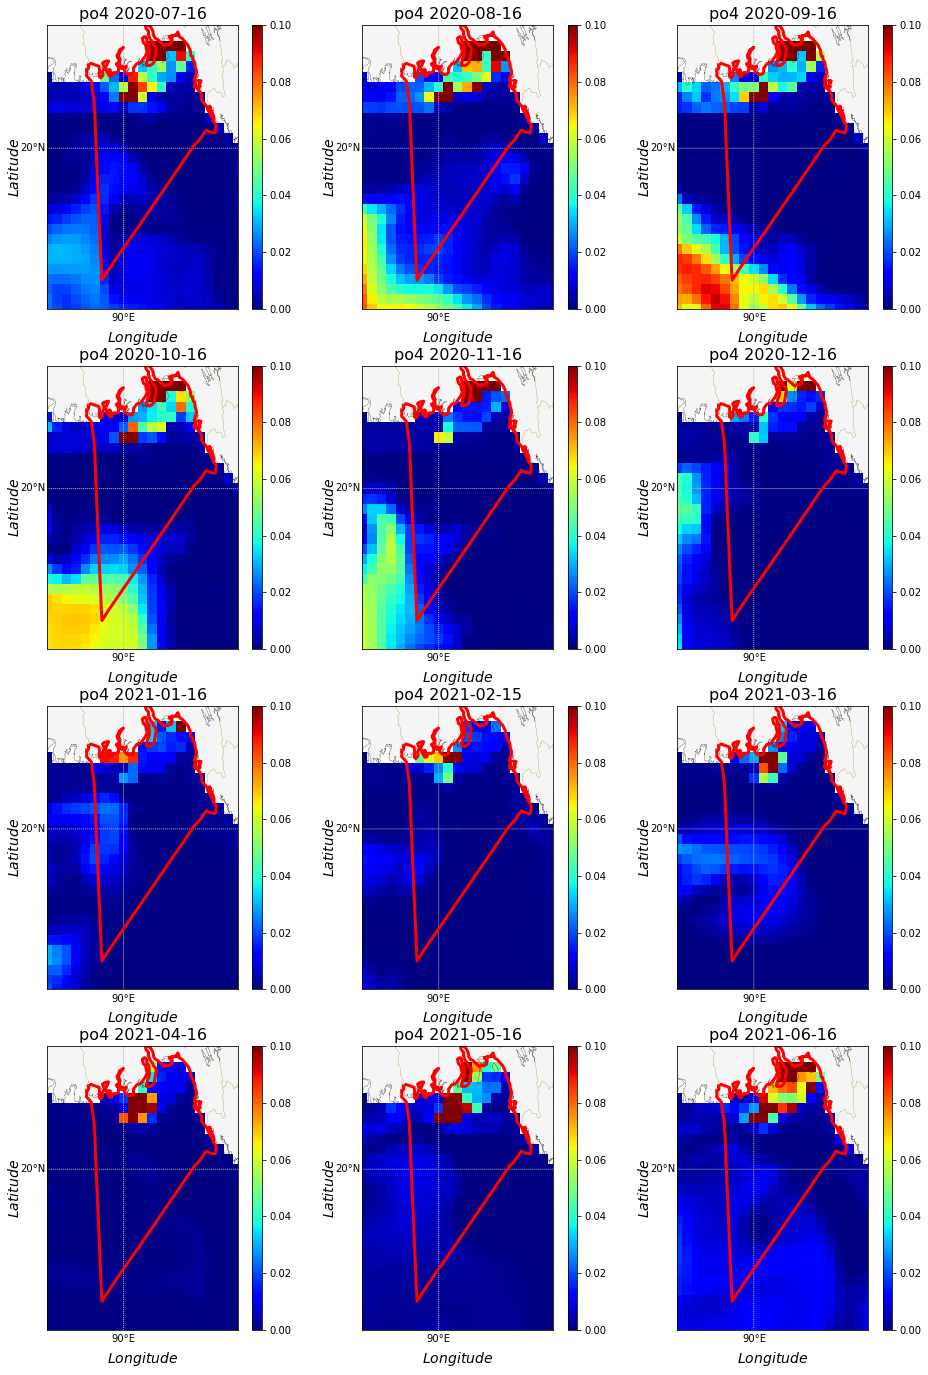

In [20]:
VarName = "po4"
Var3=FIn[VarName]
#Create the figure
fig, axes = plt.subplots(4,3, figsize=(16,24))  # 16 is width, 24 is height

axes = axes.ravel() # Convert axes to a flattened 1D array

#Loop on dates to plot data: 
#Loop on dates to plot data: 

for ti in range(len(Var3.time.values)):

    axe=axes[ti] 

    date=Var3.time.values[ti].astype('datetime64[D]')
    
    #Basemap instance with MERCATOR projection (cylindrical conformal proj)
    Map = Basemap(projection='merc',ax=axe,
                  llcrnrlon=LonMin, llcrnrlat=LatMin,
                  urcrnrlon=LonMax, urcrnrlat=LatMax,
                  resolution='i')

    # Draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    parallels = np.arange(5,24,5)
    Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
    meridians = np.arange(80,100,5)
    Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')
    Map.readshapefile('BD_boundary/BD_new_martime_boundary', 'Watersheds', color = 'red', linewidth=3)
    # Generate Lat/Lon grid
    LonG, LatG = np.meshgrid(Lon, Lat)

    # Projection from Lat/Lon to axis X/Y 
    X, Y = Map(LonG, LatG)

    # Plot scalar Var[time_index,lat,lon] 
    # Adjust scale to the min/max values
    P = axe.pcolormesh(X, Y, Var3[ti,0,:,:], cmap='jet', vmin=0, vmax=0.1)
    
    #Add color scale
    Cb = Map.colorbar(P, "right", pad=0.2)
    #Cb.ax.set_ylabel('Chlorophyll-a concentration [mg $m^{-3}$]', fontsize = 12)

    #Title
    Title = '{} {}'.format(VarName,date)
    axe.set_title(Title, fontsize=16)
    

    # Axes labels
    axe.set_ylabel('$Latitude$', labelpad=25, fontsize=14)
    axe.set_xlabel('$Longitude$', labelpad=20, fontsize=14)    
    
#Save file
FOutName = '{}/plot_{}_all_dates.png'.format(PathOut,VarName)
print('Save file:', FOutName)
plt.rcParams["font.family"] = "Times New Roman" 
#plt.savefig(FOutName)

plt.show()


### Plot time series of the monthly data from 2020 to 2021
Select the variable names: CHLOROPHYLL, OXYGEN, NITRATE AND PHOSPHATE

In [21]:
VarNameChl = 'chl'
VarNameO2 = 'o2'
VarNameNit = 'no3'
VarNamePho = 'po4'
ParamName=[VarNameChl,VarNameO2,VarNameNit,VarNamePho]
PathOut = 'Plots_model_all_param'
if not os.path.exists(PathOut):
    os.makedirs(PathOut)
print('PLOTS FOLDER:', PathOut)

PLOTS FOLDER: Plots_model_all_param


We will consider 4 points with the following lon/lat coordinates (stored in the `Latpt` and `Lonpt`variables:
- Point 1: (91.1 , 21.71)
- Point 2: (91.15 , 21.46)
- Point 3: (90.73, 21.30)
- Point 4: (90.88, 20.97)

We need to find the closest points in the products. This is the purpose of `sel(longitude=Lonpt, latitude=Latpt, method='nearest')` method.

Then we define vectors to store the parameters attributes and be able to loop on them in the next cell.

In [22]:
Lonpt=[91.1,91.15,90.73,90.88]
Latpt=[21.71,21.46,21.30,20.97]

# Selecting nearest neighbor from the file for each point defined by (Lon_section[i],Lat_section[i])
FIn_pt=FIn.sel(longitude=Lonpt, latitude=Latpt, method='nearest')
VarTime=FIn_pt.time.values

params_names_red=['Chl','O2','NO3','PO4']
params_units=['(mg.m-3)','(mmol.m-3)','(mmol.m-3)','(mmol.m-3)']

FIn_pt

<xarray.Dataset>
Dimensions:    (time: 12, depth: 50, latitude: 4, longitude: 4)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 21.75 21.5 21.25 21.0
  * time       (time) datetime64[ns] 2020-07-16T12:00:00 ... 2021-06-16
  * longitude  (longitude) float32 91.0 91.25 90.75 91.0
Data variables:
    no3        (time, depth, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    Conventions:                   CF-1.0
    comment:                       
    history:                       Data extracted from dataset http://localho...

#### Plot the parameters time series at each point

The following cell creates 1 figure with 4 subplots (1 per variable). For each variable, it will be possible to see the time series of this variable at each point location. 

This is done through:
- A loop on the parameters
    - A loop on the points

Save file: Plots_model_all_param/plot_all_param_timeseries_model_2020_2021.png


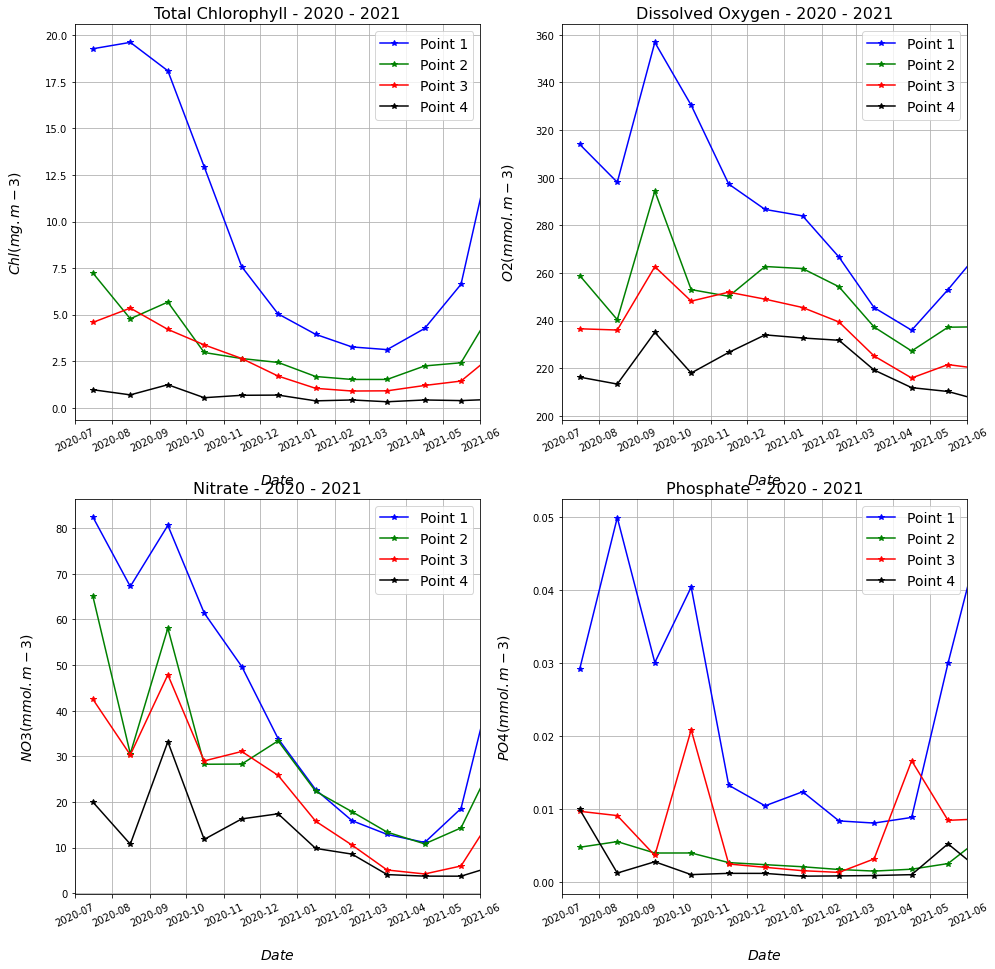

In [23]:

colors=['b', 'g', 'r','k']
labels=['Point 1','Point 2','Point 3','Point 4']


fig, axes = plt.subplots(2,2, figsize=(16,16)) 
axes = axes.ravel()

# Loop on the parameters
i=0 #Initiate the counter to loop on the axes and set their properties
for p in ParamName:
    # PLOT PARAMETER TIME SERIES

    axe=axes[i]

    for j in range(len(Lonpt)):
        #0 is the first (and only) depth level in the product
        axe.plot(VarTime.astype('datetime64[D]'),FIn_pt[p][:,0,j,j],'*-',color=colors[j])
        
    #Grid
    axe.grid(True)

    # Legend
    axe.legend(labels,fontsize=14,loc='upper right')

    #Title
    Title = '{} - 2020 - 2021'.format(FIn_pt[p].long_name)
    axe.set_title(Title, fontsize=16)

    # Axes labels
    YLabel = '${} {}$'.format(params_names_red[i],params_units[i])
    axe.set_xlabel('$Date$', labelpad=20, fontsize=14)
    axe.set_ylabel(YLabel, labelpad=20, fontsize=14)   

    # Set limits of x axis
    axe.set_xlim(VarTime[0].astype('datetime64[M]'),VarTime[-1].astype('datetime64[M]'))
    i+=1 #Don't forget to increment the counter to pass to the next axe. i+=1 is equivalent to i=i+1
    axe.tick_params(axis='x', rotation=25)
#Save file
FOutName = '{}/plot_all_param_timeseries_model_2020_2021.png'.format(PathOut)
print('Save file:', FOutName)
plt.savefig(FOutName)
plt.show() 

Thanks for viewing!!!